<a href="https://colab.research.google.com/github/jet981217/COVID19_PREDICTION_VARIOUS_AI_COMPARISON/blob/master/COVID_19_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

ANN with Zero hidden statesRandomSearchCV 최적 파라미터: {'ANN__epochs': 304, 'ANN__first_Drop_val': 0.03515050271469087, 'ANN__first_activator': 'tanh', 'ANN__first_l1': 0.002226084041141872, 'ANN__first_l2': 5.454546227910528e-05, 'ANN__first_neuron': 47, 'ANN__optimizer_val': 'rmsprop'}
4/4 [==============================] - 0s 4ms/step - loss: 7534.1621 - mae: 58.8049 - mse: 7534.0728

Best score for ANN with No hidden state is:  88.23776676935786

Prediction for ANN with No hidden state is:  [[1591.0414]]

ANN with No hidden states Mae score for Test is:  58.80494689941406

ANN with No hidden states Rmse score for Test is:  86.79903659549598


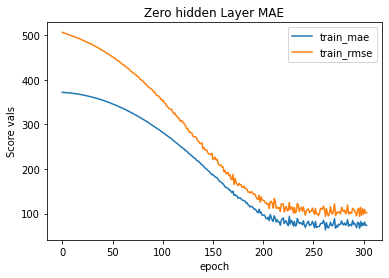


ANN with One hidden states RandomSearchCV 최적 파라미터: {'ANN_1__epochs': 252, 'ANN_1__first_Drop_val': 0.18280114099118838, 'ANN_1__first_activator': 'tanh', 'ANN_1__first_l1': 0.00045138561931269596, 'ANN_1__first_l2': 0.0024125055667129176, 'ANN_1__first_neuron': 18, 'ANN_1__optimizer_val': 'adam', 'ANN_1__second_Drop_val': 0.2100434207622668, 'ANN_1__second_activator': 'tanh', 'ANN_1__second_l1': 0.0026428745727498882, 'ANN_1__second_l2': 0.0004121850633477009, 'ANN_1__second_neuron': 61}
4/4 [==============================] - 0s 4ms/step - loss: 9950.1367 - mae: 70.5145 - mse: 9949.9561

Best score for ANN with One hidden state is:  91.58725180834158

Prediction for ANN with One hidden state is:  [[1446.8654]]

ANN with One hidden states Mae score for Test is:  70.51448822021484

ANN with One hidden states Rmse score for Test is:  99.74946643810934


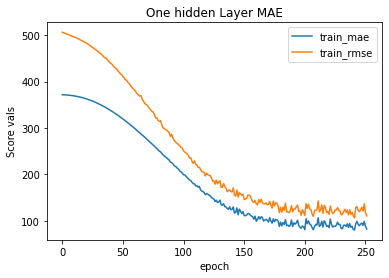


DNN with Two hidden states RandomSearchCV 최적 파라미터: {'DNN_2__epochs': 350, 'DNN_2__first_Drop_val': 0.127711622218524, 'DNN_2__first_activator': 'tanh', 'DNN_2__first_l1': 0.0009926308139114018, 'DNN_2__first_l2': 0.0020870172249769056, 'DNN_2__first_neuron': 14, 'DNN_2__optimizer_val': 'rmsprop', 'DNN_2__second_Drop_val': 0.13268339931460774, 'DNN_2__second_activator': 'sigmoid', 'DNN_2__second_l1': 0.0018795371506161412, 'DNN_2__second_l2': 0.002295372985862897, 'DNN_2__second_neuron': 48, 'DNN_2__third_Drop_val': 0.05577256314935638, 'DNN_2__third_activator': 'tanh', 'DNN_2__third_l1': 3.6214697774415216e-05, 'DNN_2__third_l2': 0.0013320832487044635, 'DNN_2__third_neuron': 56}
4/4 [==============================] - 0s 4ms/step - loss: 12147.7236 - mae: 72.7037 - mse: 12147.2363

Best score for DNN with Two hidden state is:  92.07219282220767

Prediction for DNN with Two hidden state is:  [[1436.7797]]

DNN with Two hidden states Mae score for Test is:  72.70370483398438

DNN with Tw

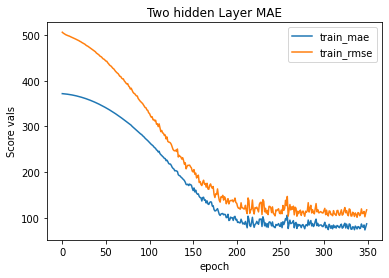

KeyboardInterrupt: ignored

In [1]:
#딥러닝 시작하자#일주일단위#셋다 파이프 만드는중 ㅇ->완료 ㅋ배치사이즈,learning rate,에포크 조기종료 추가해야하
"""
!pip install pandas
!pip install requests
!pip install scikit-learn
""" 
import keras
import codecs
import io
import sklearn
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import pandas as pd
import requests
import re
import os
from google.colab import drive
from keras import models
from keras import layers
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from keras import regularizers
import math
from scipy.stats import uniform, randint
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures
import requests
from sklearn.linear_model import LinearRegression
 
#ANN with no hidden layers
def Model_Build_Zero_Hidden(first_Drop_val,first_neuron, first_activator, optimizer_val, first_l1, first_l2):
  Model = models.Sequential()
  #입력층
  Model.add(layers.Dense(first_neuron, kernel_regularizer=regularizers.l1_l2(l1=first_l1, l2=first_l2), activation = first_activator, input_shape=(train_input.shape[1],)))
  Model.add(keras.layers.Dropout(first_Drop_val))  
  Model.add(BatchNormalization())
  #출력층
  Model.add(layers.Dense(1))
  Model.compile(optimizer=optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model
 
#ANN with one hidden layers
def Model_Build_One_Hidden(first_Drop_val, first_neuron, first_activator, second_Drop_val, second_neuron, second_activator, optimizer_val, first_l1, first_l2, second_l1, second_l2):
  Model = models.Sequential()
  #입력층
  Model.add(layers.Dense(first_neuron, kernel_regularizer=regularizers.l1_l2(l1=first_l1, l2=first_l2),activation = first_activator, input_shape=(train_input.shape[1],)))
  Model.add(keras.layers.Dropout(first_Drop_val))
  Model.add(BatchNormalization())
  #fist hidden state
  Model.add(layers.Dense(second_neuron, kernel_regularizer=regularizers.l1_l2(l1=second_l1, l2=second_l2),activation = second_activator))
  Model.add(keras.layers.Dropout(second_Drop_val)) 
  Model.add(BatchNormalization())
  #출력층
  Model.add(layers.Dense(1))
  Model.compile(optimizer=optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model
 
#DNN with two hidden layers 
def Model_Build_Two_Hidden(first_Drop_val, first_neuron, first_activator, second_Drop_val, second_neuron, second_activator, third_Drop_val, third_neuron, third_activator, optimizer_val, first_l1, first_l2, second_l1, second_l2, third_l1, third_l2):
  Model = models.Sequential()
  #입력층
  Model.add(layers.Dense(first_neuron, kernel_regularizer=regularizers.l1_l2(l1=first_l1, l2=first_l2),activation = first_activator, input_shape=(train_input.shape[1],)))
  Model.add(keras.layers.Dropout(first_Drop_val))
  Model.add(BatchNormalization())
  #fist hidden state
  Model.add(layers.Dense(second_neuron, kernel_regularizer=regularizers.l1_l2(l1=second_l1, l2=second_l2),activation = second_activator))
  Model.add(keras.layers.Dropout(second_Drop_val)) 
  Model.add(BatchNormalization())
  #second hidden state
  Model.add(layers.Dense(third_neuron, kernel_regularizer=regularizers.l1_l2(l1=third_l1, l2=third_l2),activation = third_activator))
  Model.add(keras.layers.Dropout(third_Drop_val)) 
  Model.add(BatchNormalization())
  #출력층
  Model.add(layers.Dense(1))
  Model.compile(optimizer=optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model
 
#DNN with three hidden layers 
def Model_Build_Three_Hidden(first_Drop_val, first_neuron, first_activator, second_Drop_val, second_neuron, second_activator, third_Drop_val, third_neuron, third_activator, fourth_Drop_val, fourth_neuron, fourth_activator, optimizer_val, first_l1, first_l2, second_l1, second_l2, third_l1, third_l2, fourth_l1, fourth_l2):
  Model = models.Sequential()
  #입력층
  Model.add(layers.Dense(first_neuron, kernel_regularizer=regularizers.l1_l2(l1=first_l1, l2=first_l2),activation = first_activator, input_shape=(train_input.shape[1],)))
  Model.add(keras.layers.Dropout(first_Drop_val))
  Model.add(BatchNormalization())
  #fist hidden state
  Model.add(layers.Dense(second_neuron, kernel_regularizer=regularizers.l1_l2(l1=second_l1, l2=second_l2),activation = second_activator))
  Model.add(keras.layers.Dropout(second_Drop_val)) 
  Model.add(BatchNormalization())
  #second hidden state
  Model.add(layers.Dense(third_neuron, kernel_regularizer=regularizers.l1_l2(l1=third_l1, l2=third_l2),activation = third_activator))
  Model.add(keras.layers.Dropout(third_Drop_val)) 
  Model.add(BatchNormalization())
  #third hidden state
  Model.add(layers.Dense(fourth_neuron, kernel_regularizer=regularizers.l1_l2(l1=fourth_l1, l2=fourth_l2),activation = fourth_activator))
  Model.add(keras.layers.Dropout(fourth_Drop_val)) 
  Model.add(BatchNormalization())
  #출력층
  Model.add(layers.Dense(1))
  Model.compile(optimizer=optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model 
 
#Accessing to Datas
drive.mount('/content/drive')
 
dt = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/THISWEEK_DATA.csv")
dt.head()
 
 
tr = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/NEXTWEEK_AVG_TARGET.csv")
tr.head()
 
data = dt.to_numpy()
target = tr.to_numpy()
 
#Data spilted to Train and Test. This is only for Polynomial, ANN and DNNs
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state = 42)
 
mean  = train_input.mean(axis=0)
 
 
#하이퍼파라미터 튜닝이 끝나고 마지막 training을 위해 정규화
train_input_forlast = train_input.astype('float64')
train_input_forlast -=mean
std = train_input_forlast.std(axis=0)
train_input_forlast /= std
 
NUM_CHECK_INPUT =[1629,0,0,1486,0,0,1318,0,1,1365,-2,1,1896,-1,1,1674,0,1,1710,0,1]
NUM_CHECK_INPUT = np.array(NUM_CHECK_INPUT)
NUM_CHECK_INPUT = NUM_CHECK_INPUT.astype('float64')
NUM_CHECK_INPUT -= mean
NUM_CHECK_INPUT /= std
NUM_CHECK_INPUT = np.reshape(NUM_CHECK_INPUT, (1,21))
 
 
test_input = test_input.astype('float64')
test_input -= mean
test_input /= std
 
 
 
#ANN_with no hidden layer
regressor_Zero = KerasRegressor(build_fn = Model_Build_Zero_Hidden, verbose=0)
pipe_Zero = Pipeline([('scaler', MaxAbsScaler()), ('ANN', regressor_Zero)])
 
params = {'ANN__first_Drop_val': uniform(0,0.3),
          'ANN__first_neuron': randint(10,64),
          'ANN__first_activator': ['tanh','sigmoid'],
          'ANN__optimizer_val' : ['adam','rmsprop'],
          'ANN__first_l1' : uniform(0,0.003),
          'ANN__first_l2' : uniform(0,0.003),
          'ANN__epochs' : randint(250,400),
          }
 
grid_Zero = RandomizedSearchCV(pipe_Zero,param_distributions=params, 
                              scoring = 'neg_mean_squared_error',  cv = 10, n_jobs = -1, verbose=0)
 
grid_Zero.fit(train_input, train_target)
 
 
print('\nANN with Zero hidden state''sRandomSearchCV 최적 파라미터:', grid_Zero.best_params_)
 
Model_Zero = Model_Build_Zero_Hidden(grid_Zero.best_params_.get('ANN__first_Drop_val'), grid_Zero.best_params_.get('ANN__first_neuron'), grid_Zero.best_params_.get('ANN__first_activator'), grid_Zero.best_params_.get('ANN__optimizer_val'), grid_Zero.best_params_.get('ANN__first_l1'), grid_Zero.best_params_.get('ANN__first_l2'))
history_Zero = Model_Zero.fit(train_input_forlast, train_target, epochs= grid_Zero.best_params_.get('ANN__epochs'), verbose=0)
 
Model_Zero_mse_score, Model_Zero_mae_score, Model_Zero_rmse_score= Model_Zero.evaluate(test_input, test_target)
 
print('\nBest score for ANN with No hidden state is: ', math.sqrt(-1*grid_Zero.best_score_))
print('\nPrediction for ANN with No hidden state is: ', Model_Zero.predict([NUM_CHECK_INPUT]))
print('\nANN with No hidden state''s Mae score for Test is: ',Model_Zero_mae_score)
print('\nANN with No hidden state''s Rmse score for Test is: ',math.sqrt(Model_Zero_rmse_score))
 
plt.title("Zero hidden Layer MAE")
plt.plot(history_Zero.history['mae'])
plt.plot(np.sqrt(history_Zero.history['mse']))
plt.xlabel('epoch')
plt.ylabel('Score vals')
plt.legend(['train_mae', 'train_rmse'])
plt.show()
 
 
#ANN with 1 hidden layers
regressor_One = KerasRegressor(build_fn = Model_Build_One_Hidden, verbose=0)
pipe_One = Pipeline([('scaler', MaxAbsScaler()), ('ANN_1', regressor_One)])
 
params = {'ANN_1__first_Drop_val': uniform(0,0.3),
          'ANN_1__first_neuron': randint(10,64),
          'ANN_1__first_activator': ['tanh','sigmoid'],
          'ANN_1__second_Drop_val': uniform(0,0.3),
          'ANN_1__second_neuron': randint(10,64),
          'ANN_1__second_activator': ['tanh','sigmoid'],
          'ANN_1__optimizer_val' : ['adam','rmsprop'],
          'ANN_1__first_l1' : uniform(0,0.003),
          'ANN_1__first_l2' : uniform(0,0.003), 
          'ANN_1__second_l1' : uniform(0,0.003),
          'ANN_1__second_l2' : uniform(0,0.003),
          'ANN_1__epochs' : randint(250,400),
          }
 
grid_One = RandomizedSearchCV(pipe_One,param_distributions=params, 
                              scoring = 'neg_mean_squared_error',  cv = 10, n_jobs = -1, verbose=0)
 
grid_One.fit(train_input, train_target)
 
print('\nANN with One hidden state''s RandomSearchCV 최적 파라미터:', grid_One.best_params_)
 
Model_One = Model_Build_One_Hidden(grid_One.best_params_.get('ANN_1__first_Drop_val'), grid_One.best_params_.get('ANN_1__first_neuron'), grid_One.best_params_.get('ANN_1__first_activator'), grid_One.best_params_.get('ANN_1__second_Drop_val'), grid_One.best_params_.get('ANN_1__second_neuron'), grid_One.best_params_.get('ANN_1__second_activator'), grid_One.best_params_.get('ANN_1__optimizer_val'), grid_One.best_params_.get('ANN_1__first_l1'), grid_One.best_params_.get('ANN_1__first_l2'), grid_One.best_params_.get('ANN_1__second_l1'), grid_One.best_params_.get('ANN_1__second_l2'))
history_One = Model_One.fit(train_input_forlast, train_target, epochs=grid_One.best_params_.get('ANN_1__epochs'), verbose=0)
 
Model_One_mse_score, Model_One_mae_score, Model_One_rmse_score = Model_One.evaluate(test_input, test_target)
 
print('\nBest score for ANN with One hidden state is: ', math.sqrt(-1*grid_One.best_score_))
print('\nPrediction for ANN with One hidden state is: ', Model_One.predict([NUM_CHECK_INPUT]))
print('\nANN with One hidden state''s Mae score for Test is: ',Model_One_mae_score)
print('\nANN with One hidden state''s Rmse score for Test is: ',math.sqrt(Model_One_rmse_score))
 
plt.title("One hidden Layer MAE")
plt.plot(history_One.history['mae'])
plt.plot(np.sqrt(history_One.history['mse']))
plt.xlabel('epoch')
plt.ylabel('Score vals')
plt.legend(['train_mae', 'train_rmse'])
plt.show()
 
 
 
 
#DNN with 2 hidden layers
 
regressor_Two = KerasRegressor(build_fn = Model_Build_Two_Hidden, verbose=0)
pipe_Two = Pipeline([('scaler', MaxAbsScaler()), ('DNN_2', regressor_Two)])
 
params = {'DNN_2__first_Drop_val': uniform(0,0.3),
          'DNN_2__first_neuron': randint(10,64),
          'DNN_2__first_activator': ['tanh','sigmoid'],
          'DNN_2__second_Drop_val': uniform(0,0.3),
          'DNN_2__second_neuron': randint(10,64),
          'DNN_2__second_activator': ['tanh','sigmoid'],
          'DNN_2__third_Drop_val': uniform(0,0.3),
          'DNN_2__third_neuron': randint(10,64),
          'DNN_2__third_activator': ['tanh','sigmoid'],
          'DNN_2__optimizer_val' : ['adam','rmsprop'],
          'DNN_2__first_l1' : uniform(0,0.003),
          'DNN_2__first_l2' : uniform(0,0.003), 
          'DNN_2__second_l1' : uniform(0,0.003),
          'DNN_2__second_l2' : uniform(0,0.003),
          'DNN_2__third_l1' : uniform(0,0.003),
          'DNN_2__third_l2' : uniform(0,0.003),
          'DNN_2__epochs' : randint(250,400),      
          }
 
grid_Two = RandomizedSearchCV(pipe_Two,param_distributions=params, 
                              scoring = 'neg_mean_squared_error',  cv = 10, n_jobs = -1, verbose=0)
 
grid_Two.fit(train_input, train_target)
 
print('\nDNN with Two hidden state''s RandomSearchCV 최적 파라미터:', grid_Two.best_params_)
 
Model_Two = Model_Build_Two_Hidden(grid_Two.best_params_.get('DNN_2__first_Drop_val'), grid_Two.best_params_.get('DNN_2__first_neuron'), grid_Two.best_params_.get('DNN_2__first_activator'), grid_Two.best_params_.get('DNN_2__second_Drop_val'), grid_Two.best_params_.get('DNN_2__second_neuron'), grid_Two.best_params_.get('DNN_2__second_activator'), grid_Two.best_params_.get('DNN_2__third_Drop_val'), grid_Two.best_params_.get('DNN_2__third_neuron'), grid_Two.best_params_.get('DNN_2__third_activator'), grid_Two.best_params_.get('DNN_2__optimizer_val'), grid_Two.best_params_.get('DNN_2__first_l1'), grid_Two.best_params_.get('DNN_2__first_l2'), grid_Two.best_params_.get('DNN_2__second_l1'), grid_Two.best_params_.get('DNN_2__second_l2'), grid_Two.best_params_.get('DNN_2__third_l1'), grid_Two.best_params_.get('DNN_2__third_l2'))
history_Two = Model_Two.fit(train_input_forlast, train_target, epochs=grid_Two.best_params_.get('DNN_2__epochs'), verbose=0)
 
Model_Two_mse_score, Model_Two_mae_score, Model_Two_mse_score = Model_Two.evaluate(test_input, test_target)
 
print('\nBest score for DNN with Two hidden state is: ', math.sqrt(-1*grid_Two.best_score_))
print('\nPrediction for DNN with Two hidden state is: ', Model_Two.predict([NUM_CHECK_INPUT]))
print('\nDNN with Two hidden state''s Mae score for Test is: ',Model_Two_mae_score)
print('\nDNN with Two hidden state''s Rmse score for Test is: ',math.sqrt(Model_Two_mse_score))
 
plt.title("Two hidden Layer MAE")
plt.plot(history_Two.history['mae'])
plt.plot(np.sqrt(history_Two.history['mse']))
plt.xlabel('epoch')
plt.ylabel('Score vals')
plt.legend(['train_mae', 'train_rmse'])
plt.show()
 
 
 
 
#DNN with 3 hidden layers
 
regressor_Three = KerasRegressor(build_fn = Model_Build_Three_Hidden, verbose=0)
pipe_Three = Pipeline([('scaler', MaxAbsScaler()), ('DNN_3', regressor_Three)])
 
params = {'DNN_3__first_Drop_val': uniform(0,0.3),
          'DNN_3__first_neuron': randint(10,64),
          'DNN_3__first_activator': ['tanh','sigmoid'],
          'DNN_3__second_Drop_val': uniform(0,0.3),
          'DNN_3__second_neuron': randint(10,64),
          'DNN_3__second_activator': ['tanh','sigmoid'],
          'DNN_3__third_Drop_val': uniform(0,0.3),
          'DNN_3__third_neuron': randint(10,64),
          'DNN_3__third_activator': ['tanh','sigmoid'],
          'DNN_3__fourth_Drop_val': uniform(0,0.3),
          'DNN_3__fourth_neuron': randint(10,64),
          'DNN_3__fourth_activator': ['tanh','sigmoid'],          
          'DNN_3__optimizer_val' : ['adam','rmsprop'],
          'DNN_3__first_l1' : uniform(0,0.003),
          'DNN_3__first_l2' : uniform(0,0.003), 
          'DNN_3__second_l1' : uniform(0,0.003),
          'DNN_3__second_l2' : uniform(0,0.003),
          'DNN_3__third_l1' : uniform(0,0.003),
          'DNN_3__third_l2' : uniform(0,0.003),
          'DNN_3__fourth_l1' : uniform(0,0.003),
          'DNN_3__fourth_l2' : uniform(0,0.003),          
          'DNN_3__epochs' : randint(250,400),      
          }
 
grid_Three = RandomizedSearchCV(pipe_Three,param_distributions=params, 
                              scoring = 'neg_mean_squared_error',  cv = 10, n_jobs = -1, verbose=0)
 
grid_Three.fit(train_input, train_target)
 
print('\nDNN with Three hidden state''s RandomSearchCV 최적 파라미터:', grid_Three.best_params_)
 
Model_Three = Model_Build_Three_Hidden(grid_Three.best_params_.get('DNN_3__first_Drop_val'), grid_Three.best_params_.get('DNN_3__first_neuron'), grid_Three.best_params_.get('DNN_3__first_activator'), grid_Three.best_params_.get('DNN_3__second_Drop_val'), grid_Three.best_params_.get('DNN_3__second_neuron'), grid_Three.best_params_.get('DNN_3__second_activator'), grid_Three.best_params_.get('DNN_3__third_Drop_val'), grid_Three.best_params_.get('DNN_3__third_neuron'), grid_Three.best_params_.get('DNN_3__third_activator'), params_.get('DNN_3__fourth_Drop_val'), grid_Three.best_params_.get('DNN_3__fourth_neuron'), grid_Three.best_params_.get('DNN_3__fourth_activator'), grid_Three.best_params_.get('DNN_3__optimizer_val'),grid_Three.best_params_.get('DNN_3__first_l1'), grid_Three.best_params_.get('DNN_3__first_l2'), grid_Three.best_params_.get('DNN_3__second_l1'), grid_Three.best_params_.get('DNN_3__second_l2'), grid_Three.best_params_.get('DNN_3__third_l1'), grid_Three.best_params_.get('DNN_3__third_l2'), grid_Three.best_params_.get('DNN_3__fourth_l1'), grid_Three.best_params_.get('DNN_3__fourth_l2'))
history_Three = Model_Three.fit(train_input_forlast, train_target, epochs=grid_Three.best_params_.get('DNN_3__epochs'), verbose=0)
 
Model_Three_mse_score, Model_Three_mae_score, Model_Three_mse_score = Model_Three.evaluate(test_input, test_target)
 
print('\nBest score for DNN with Three hidden state is: ', math.sqrt(-1*grid_Three.best_score_))
print('\nPrediction for DNN with Three hidden state is: ', Model_Three.predict([NUM_CHECK_INPUT]))
print('\nDNN with Three hidden state''s Mae score for Test is: ',Model_Three_mae_score)
print('\nDNN with Three hidden state''s Rmse score for Test is: ',math.sqrt(Model_Three_mse_score))
 
plt.title("Three hidden Layer MAE")
plt.plot(history_Three.history['mae'])
plt.plot(np.sqrt(history_Three.history['mse']))
plt.xlabel('epoch')
plt.ylabel('Score vals')
plt.legend(['train_mae', 'train_rmse'])
plt.show()

In [ ]:
#키워드 분류 Daily
!pip install pandas
!pip install requests
#!pip install kreas
!pip install scikit-learn
!pip install tensorflow

import codecs
import io
from tqdm import tqdm
from sklearn.model_selection import train_test_split
#from tensorflow import kreas
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import requests
import re
#from tensorflow import kreas
import os
from google.colab import drive


def File_Access(File_To_Write, poslist, neglist, path, file_name,temp):
  c = path + "/" + file_name
  
  news_labels = pd.read_csv(c)
  news_labels.head()
  news_labels.to_numpy()
  sum = 0
  for member in Tag_Search(poslist, neglist, news_labels):
    sum += member
  if temp == 0:
      File_To_Write.write(str(sum)+"\n")
  else:
      File_To_Write.write(str(sum))
  
  return sum

def Tag_Search(poslist, neglist, lists):
  label_lists = []
  for names in lists:
    temp_label = 0
    sub_names = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》]', '', names)
    is_positive = False
    is_negative = False

    for positive_words in poslist:
      if sub_names.find(positive_words) == 1:
        is_positive = True
        break
    for negative_words in neglist:
      if sub_names.find(negative_words) == 1:
        is_negative = True
        break
    
    if (is_positive == False and is_negative == False):
      temp_label = 0
    if is_positive == True:
      temp_label = 1
    elif is_negative == True:
      temp_label = -1

    label_lists.append(temp_label)
  
  return label_lists
    


drive.mount('/content/drive')

path = "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA"
file_list = os.listdir(path)

#긍정부정 라벨링
poslist = []
neglist = []
#긍정 단어들
positive = codecs.open("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/Keywords/positive.csv", 'rb', encoding='UTF-8')

while True:
  ln = positive.readline()
  ln = ln.replace('\n','')
  poslist.append(ln)
  if not ln: break
#부정 단어들
neagative = codecs.open("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/Keywords/negative.csv", 'rb', encoding='UTF-8')

while True:
  ln = neagative.readline()
  ln = ln.replace('\n','')
  neglist.append(ln)
  if not ln: break

c = "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/Crwal_Label/LABEL_DATA_DAILY.csv"
  
f = open(c, 'w')#r:읽기모드 w:쓰기모드 a:추가모드(끝에추가)


for file in file_list:
  temp = 0
  if file is file_list[-1]:
    temp = 1
  
  File_Access(f, poslist, neglist, path, file,temp)

f.close()
#dt = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/COVID_ADDED.csv")
#dt.head()

 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Crwaling
!pip install Selenium
!pip install requests
!apt-get update 

!apt install chromium-chromedriver

from selenium import webdriver
from bs4 import BeautifulSoup
from datetime import datetime
import requests

chrome_options = webdriver.ChromeOptions()

chrome_options.add_argument('--headless') 

chrome_options.add_argument('--no-sandbox')

chrome_options.add_argument('--disable-dev-shm-usage')


def Crwal_Data(Year, Month, Day):
  lists = []
  for i in range(0, 30):
    Call_Vals(Year, Month, Day, i*10+1, lists)

  print(lists)
  return lists

def Call_Vals(Year, Month, Day, n, lists):
  c = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%98&sort=0&photo=0&field=0&pd=3&ds=' + str(Year) + '.' + str(Month) + '.' + Day+ '&de=' + str(Year) + '.' + str(Month) + '.' + str(Day)+ '&cluster_rank=48&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from'+ str(Year) + str(Month) + str(Day) +'to'+ str(Year) + str(Month) + str(Day) +',a:all&start='+str(n)
  request = requests.get(c)
  html = request.text
  soup = BeautifulSoup(html, 'html.parser')

  # select 과정
  links = soup.select('#main_pack > section.sc_new.sp_nnews._prs_nws > div > div.group_news > ul.list_news')

  for article in links:
    a_tag = article.select('div.news_wrap.api_ani_send > div.news_area > a')
    for temp_tag in a_tag:
      lists.append(temp_tag['title'])
  
def Write_File(Year, Month, Day, File_Pos):
  c = File_Pos + str(Year) + str(Month) + Day+".txt"
  
  f = open(c, 'w')#r:읽기모드 w:쓰기모드 a:추가모드(끝에추가)#새파일생성할거임매일
  lists = Crwal_Data(str(Year), str(Month), Day)
  f.write(','.join(lists))
  #print(f.read())
  f.close()
"""
for Day in range(21, 29) :
  Write_File('2020', '02', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2020', '03', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 30) :
  Write_File('2020', '04', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2020', '05', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 30) :
  Write_File('2020', '06', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2020', '07', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")


Write_File('2020', '02', '29', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
Write_File('2020', '03', '31', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
Write_File('2020', '04', '30', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
Write_File('2020', '05', '31', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
Write_File('2020', '06', '30', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
Write_File('2020', '07', '31', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
"""
"""
for Day in range(19, 32) :
  Write_File('2020', '08', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2020', '09', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 32) :
  Write_File('2020', '10', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2020', '11', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 32) :
  Write_File('2020', '12', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 32) :
  Write_File('2021', '01', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(28, 29) :
  Write_File('2021', '02', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 32) :
  Write_File('2021', '03', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2021', '04', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 32) :
  Write_File('2021', '05', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2021', '06', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 28) :
  Write_File('2021', '07', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

#Write_File('2021', '07', '07', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
"""

Write_File('2021', '07', '31', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
for Day in range(1, 4) :
  Write_File('2021', '08', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")


     |████████████████████████████████| 904 kB 13.3 MB/s 
Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ub